In [64]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Punto 1
Clustering/Agrupamiento

Usando los datos de ’cars.csv’ realice lo siguiente:


In [65]:
data = pd.read_csv('cars.csv')
data.head()

,year,price,transmission,mileage,tax,mpg,engineSize,Make
0,2016,9299.0,0,59604.0,0,60.1,1.4,1
1,2017,12399.0,0,9200.0,125,51.4,1.2,6
2,2018,13450.0,0,32127.0,150,65.7,2.0,6
3,2016,11490.0,0,61440.0,145,55.4,2.0,6
4,2019,24995.0,0,1426.0,145,34.0,2.0,4


In [66]:
data.drop(columns=['transmission'],inplace=True) # No aporta nada la columna ID. Drop me sirve para eliminar una columna que no me aporta nada
data.head()

,year,price,mileage,tax,mpg,engineSize,Make
0,2016,9299.0,59604.0,0,60.1,1.4,1
1,2017,12399.0,9200.0,125,51.4,1.2,6
2,2018,13450.0,32127.0,150,65.7,2.0,6
3,2016,11490.0,61440.0,145,55.4,2.0,6
4,2019,24995.0,1426.0,145,34.0,2.0,4


## •Analisis univariante

In [67]:
data[['year','price']].describe().T

,count,mean,std,min,25%,50%,75%,max
year,2896.0,2017.130180,2.073929,2002.0,2016.0,2017.0,2019.00,2020.0
price,2896.0,16569.031768,8948.071189,675.0,10269.5,14557.5,20490.25,88980.0


### Analisis univariante de variables numericas:

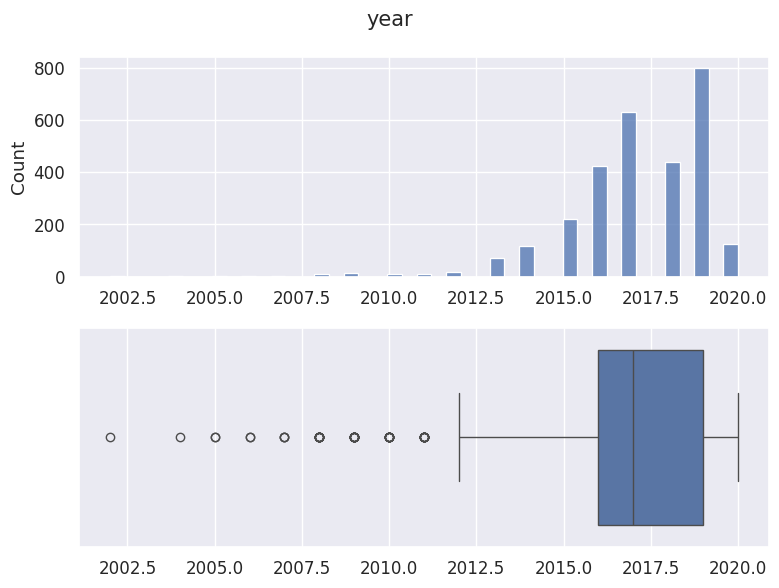

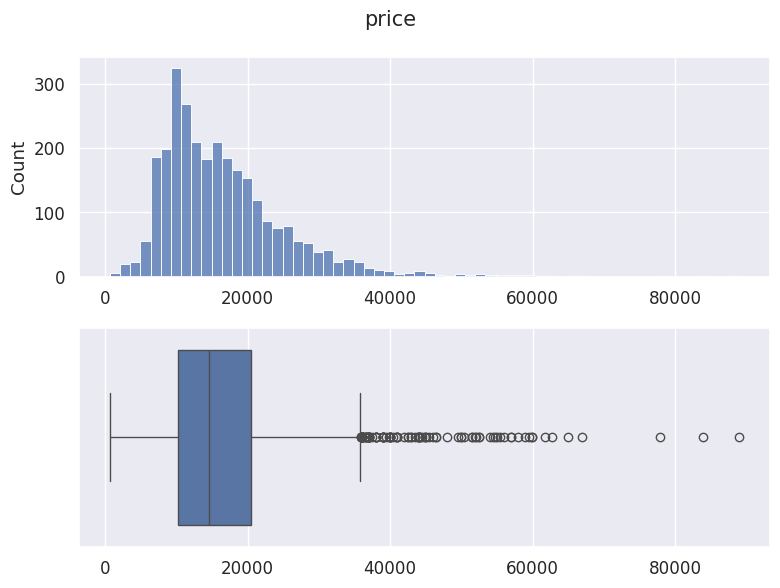

In [68]:
sns.set(font_scale=1.1)
for col in ["year","price"]:
    fig,ax = plt.subplots(2,1,figsize=(8,6),tight_layout=True)
    fig.suptitle(col,size=15)
    sns.histplot(x=data[col],ax=ax[0])
    sns.boxplot(x=data[col],ax=ax[1])
    ax[0].set_xlabel("")
    ax[1].set_xlabel("")
    plt.show()

## •Analisis bivariante


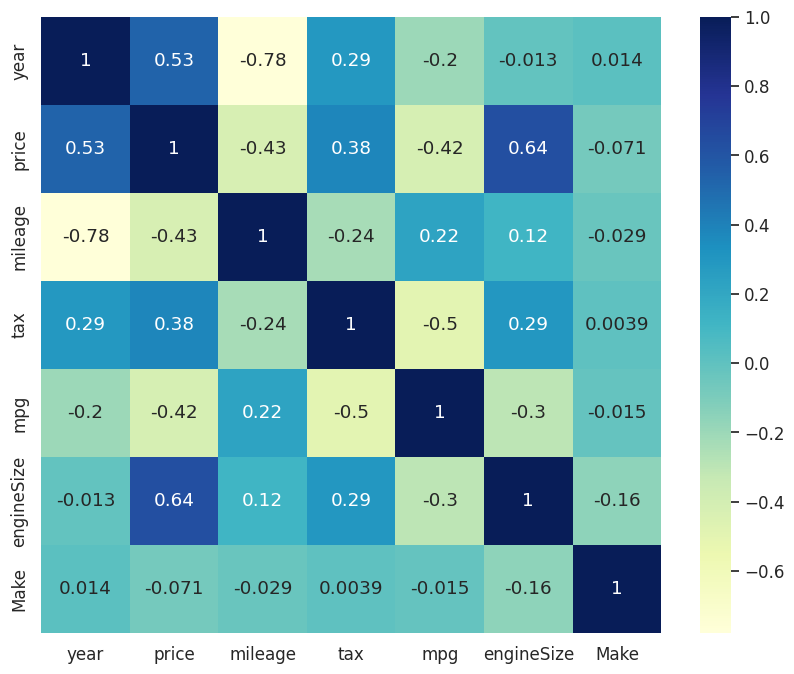

In [69]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)#annot es para mostrar los numeros en cada casilla del mapa de calor
plt.show()

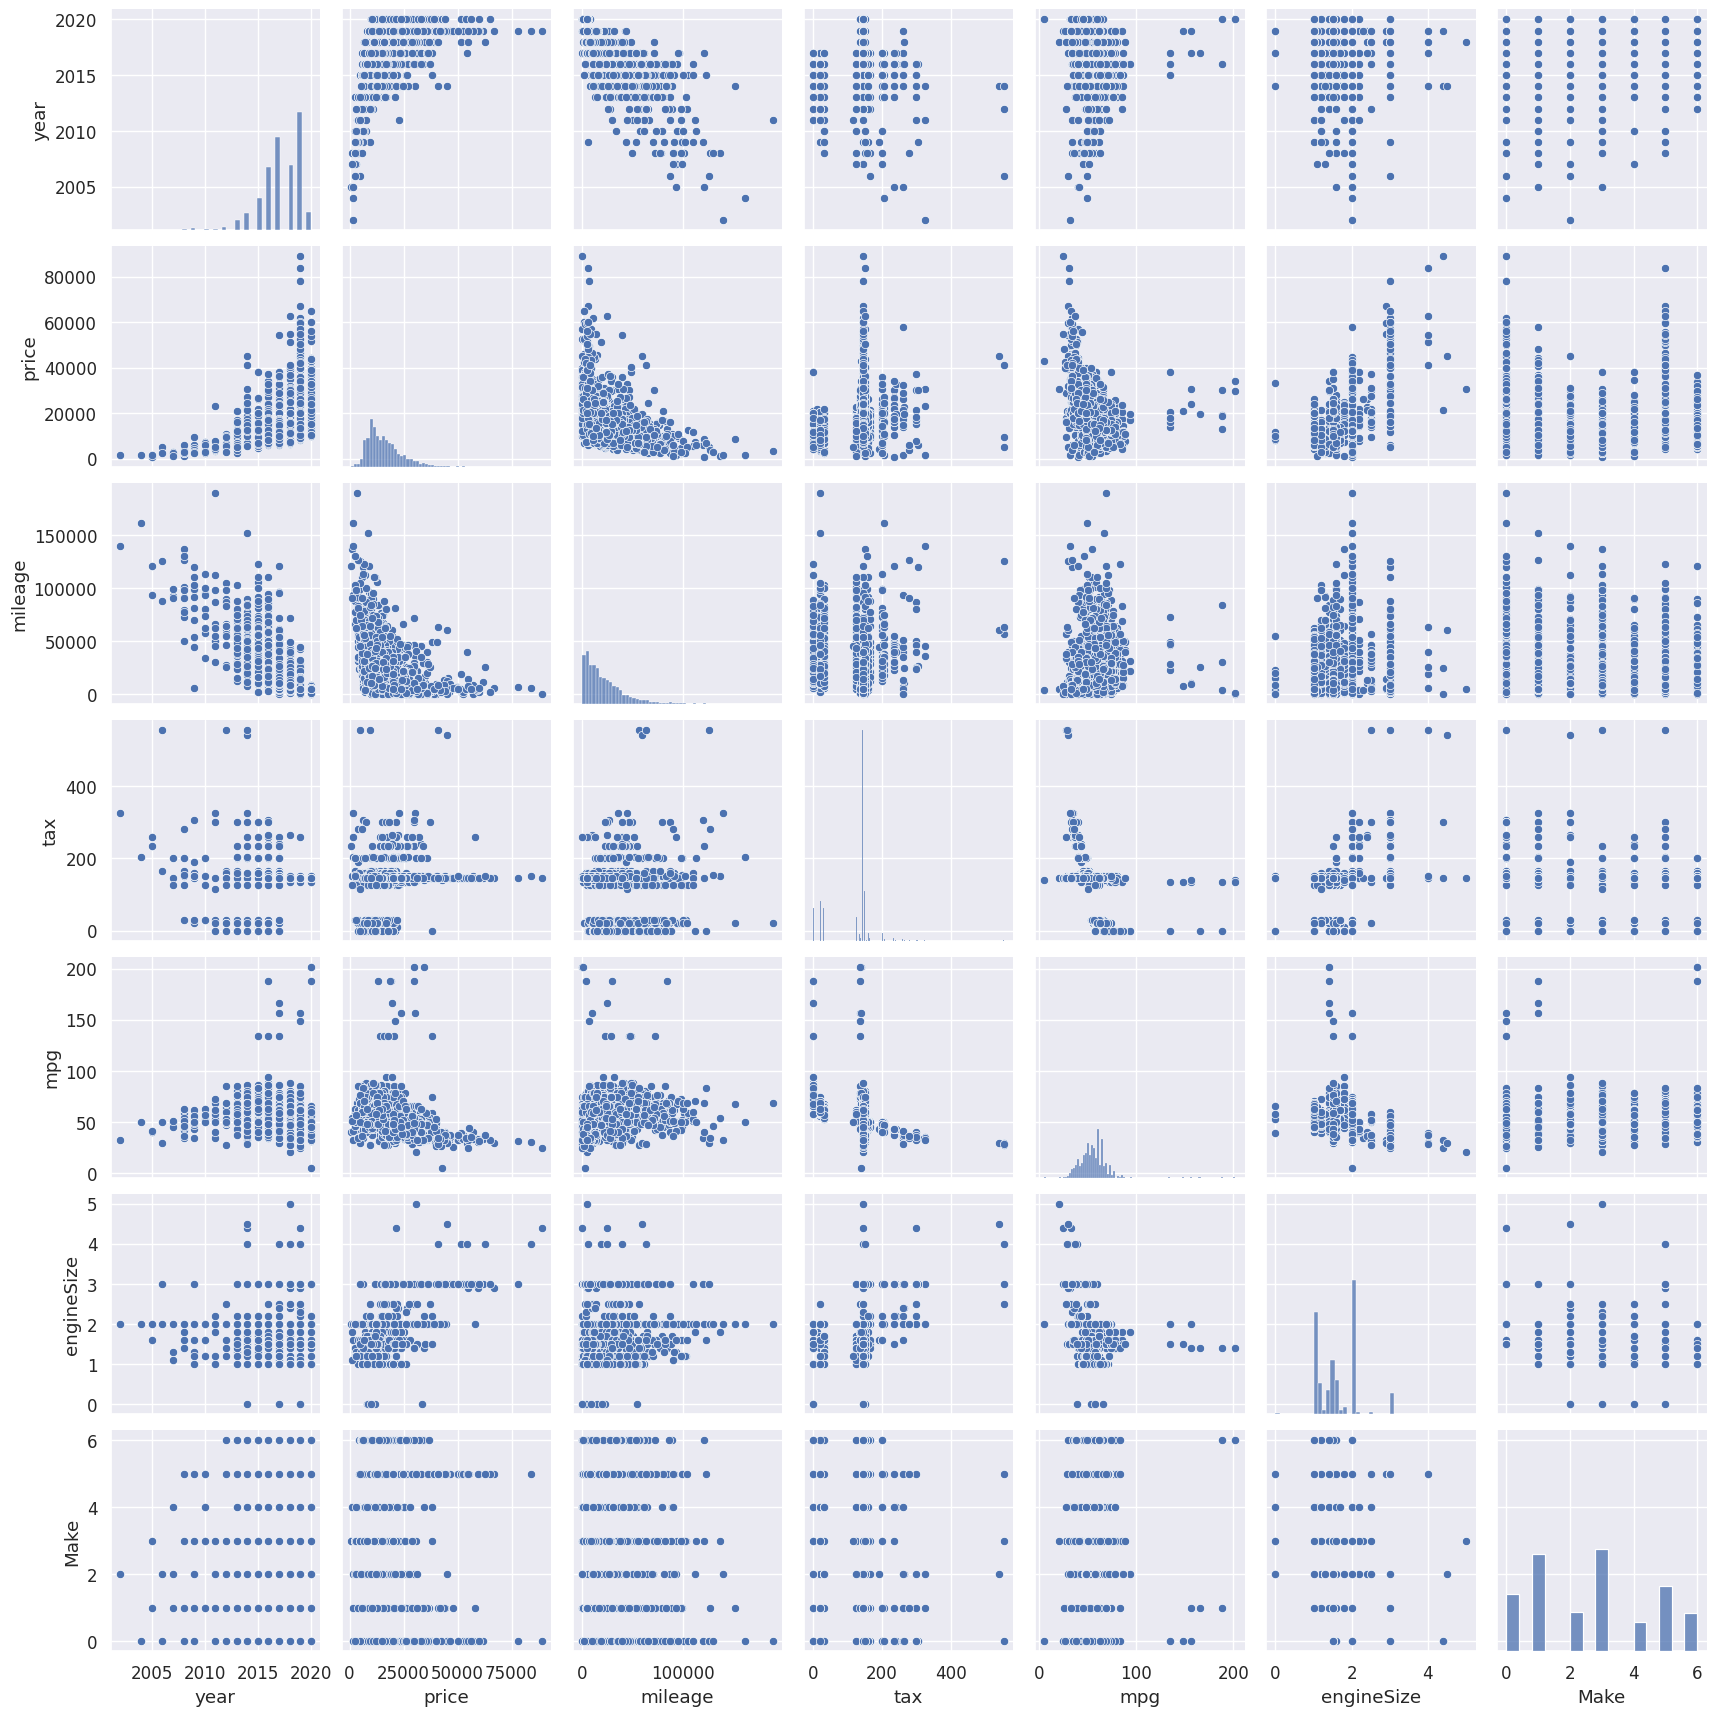

In [70]:
sns.pairplot(data)
plt.show()

## •Normalizar los datos (MinMaxScaler)


In [71]:
data_norm = MinMaxScaler().fit_transform(data) # se calcula maximo y minimo, luego se aplica la formula
print(f"min: {data_norm.min(axis=0)}")
print(f"max: {data_norm.max(axis=0)}")

min: [0. 0. 0. 0. 0. 0. 0.]
max: [1. 1. 1. 1. 1. 1. 1.]


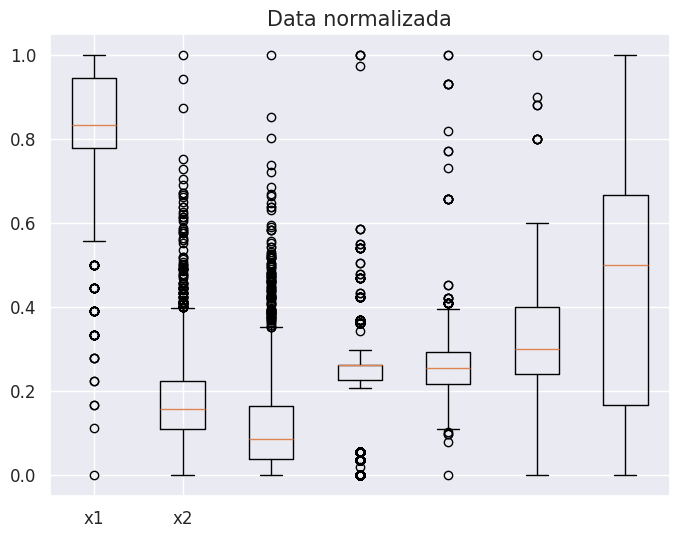

In [72]:
plt.figure(figsize=(8,6))
plt.title("Data normalizada", size=15)
plt.boxplot(data_norm)
plt.xticks([1, 2], ['x1','x2'], size=12)
plt.show()

## •PCA en R2


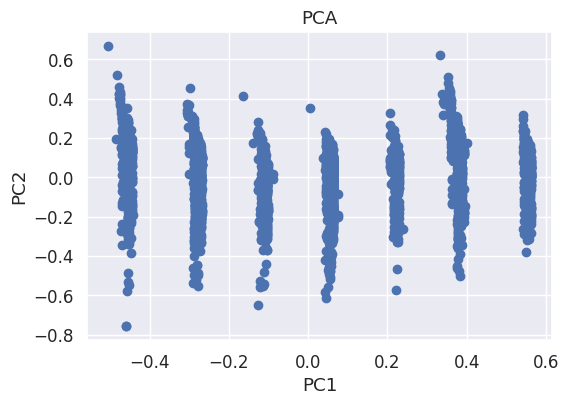

In [73]:
pca = PCA(n_components=2).fit(data_norm)
pca_projection = pca.transform(data_norm)
plt.scatter(*pca_projection.T)
plt.title("PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

## •Definir la cantidad ideal de clusters usando KMeans. 
Para esto se debe mostrar visualizaciones de la inercia y el coeficiente de silueta. No es necesario simular con diferentes
metrics

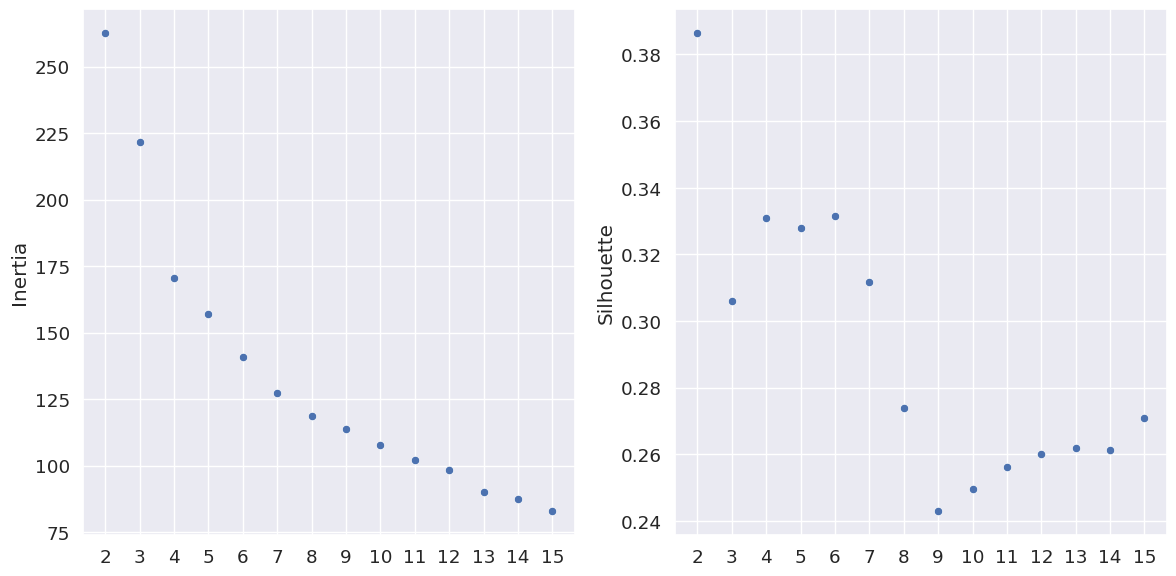

In [74]:
list_silhouette = []#Que tan alejado está un cluster del otro, siempre me devulve valores entre menos uno y una, menos uno es malo
#y 1 es bueno
list_inertia = []# Que tan dispersos están los datos respecto al centro
list_k = list(range(2,16))
for k in list_k:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(data_norm)
    list_silhouette.append(silhouette_score(data_norm,kmeans.labels_))
    list_inertia.append(kmeans.inertia_)

sns.set(rc={"figure.figsize":(12, 6)})
sns.set(font_scale=1.2)
fig,ax = plt.subplots(1,2,tight_layout=True)
sns.scatterplot(x=list_k,y=list_inertia,ax=ax[0])
ax[0].set_ylabel("Inertia")
ax[0].set_xticks(list_k)
sns.scatterplot(x=list_k,y=list_silhouette,ax=ax[1])
ax[1].set_ylabel("Silhouette")
ax[1].set_xticks(list_k)
plt.show()

Los resultados indican que 6 o 7 clusters estaria bien.


• Usando la misma cantidad de clusters definida en el numeral anterior, genere un modelo
usando Hierarchical Clustering de tipo aglomerativo, recuerde realizar el dendograma.
Luego muestre los resultados de ambos modelos usando PCA en R2. ¿Los resultados
son similares?

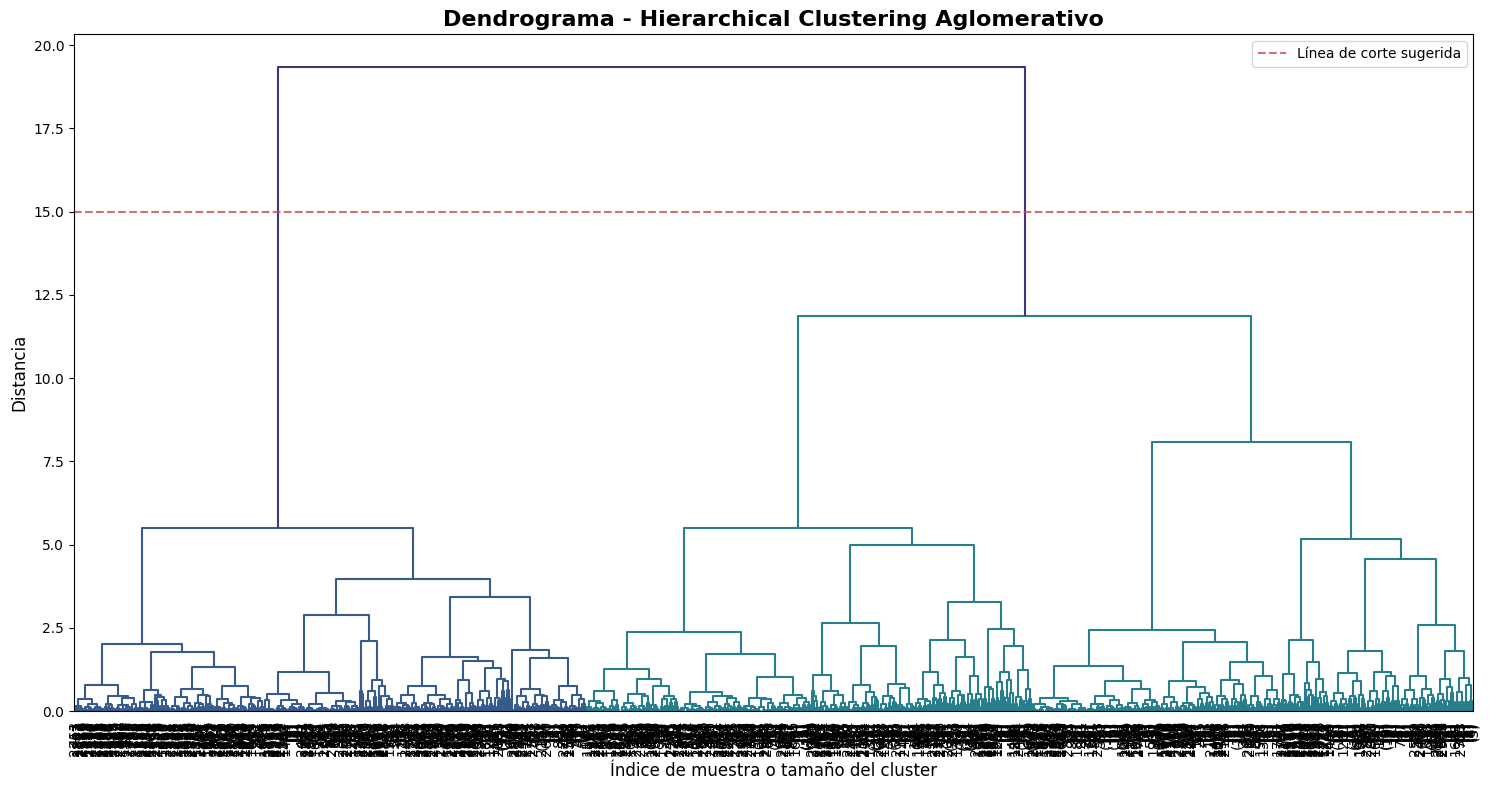

In [75]:
plt.style.use('default')
sns.set_palette("viridis")

linkage_matrix = linkage(data_norm, method='ward', metric='euclidean')

plt.figure(figsize=(15, 8))
dendrogram(linkage_matrix,
           truncate_mode='level',
           p=10,
           show_leaf_counts=True,
           leaf_rotation=90,
           leaf_font_size=10,
           show_contracted=True)

plt.title('Dendrograma - Hierarchical Clustering Aglomerativo', fontsize=16, fontweight='bold')
plt.xlabel('Índice de muestra o tamaño del cluster', fontsize=12)
plt.ylabel('Distancia', fontsize=12)
plt.axhline(y=15, color='r', linestyle='--', alpha=0.8, label='Línea de corte sugerida')
plt.legend()
plt.tight_layout()
plt.show()

k = 6

hc_model = AgglomerativeClustering(n_clusters=k, 
                                  linkage='ward')
hc_clusters = hc_model.fit_predict(data_norm)


/tmp/ipykernel_2427/3476172693.py:23: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter2 = ax2.scatter(pca_df['PC1'], pca_df['PC2'],


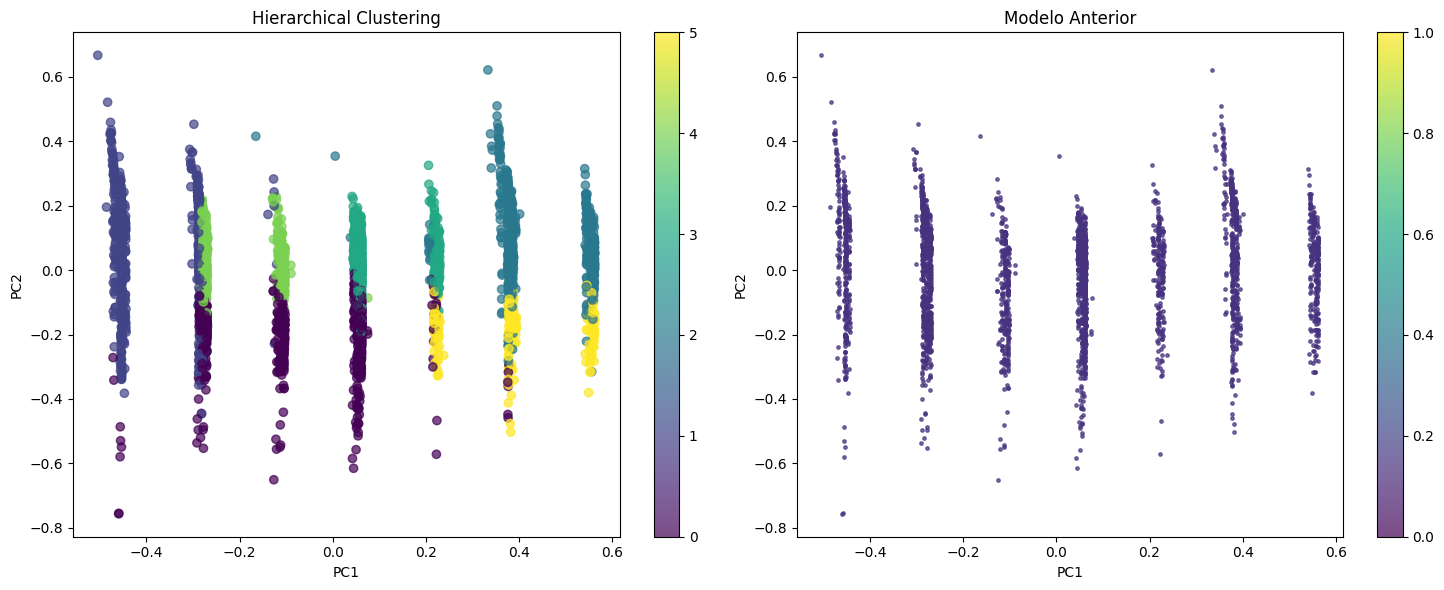

In [76]:
# Asumiendo que ya tienes:
# - hc_clusters (clusters del hierarchical clustering)
# - previous_clusters (clusters del modelo anterior)
# - data_normalized (datos normalizados)

# Aplicar PCA para visualización en 2D
pca = PCA(n_components=2)
pca_components = pca.fit_transform(data_norm)
pca_df = pd.DataFrame(pca_components, columns=['PC1', 'PC2'])

# Visualización comparativa
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Hierarchical Clustering
scatter1 = ax1.scatter(pca_df['PC1'], pca_df['PC2'], 
                      c=hc_clusters, cmap='viridis', alpha=0.7)
ax1.set_title('Hierarchical Clustering')
ax1.set_xlabel('PC1')
ax1.set_ylabel('PC2')
plt.colorbar(scatter1, ax=ax1)

# Modelo anterior
scatter2 = ax2.scatter(pca_df['PC1'], pca_df['PC2'], 
                      6, cmap='viridis', alpha=0.7)
ax2.set_title('Modelo Anterior')
ax2.set_xlabel('PC1')
ax2.set_ylabel('PC2')
plt.colorbar(scatter2, ax=ax2)

plt.tight_layout()
plt.show()

Son relativamente similares

# Punto 2

Regresion Lineal Simple

Dataset: El dataset contiene informacion sobre precios de viviendad con las siguientes
variables:

•price: precio de la vivienda (target)

•area: area de la vivienda en pies cuadrados

•bedrooms: numero de habitaciones

•bathrooms: numero de banos

•stories: numero de pisos

•parking: numero de plazas de parking

## 1. Analisis exploratorio de datos

•Realice un analisis estadıstico descriptivo de todas las variables.

•Genere graficos de dispersion entre las variable objetivo (price) y cada variable
independiente.

•Calcule la matriz de correlacion e identifique las variables mas correlacionadas con
el precio.

•Detecte y maneje valores atıpicos si es necesario.

In [104]:
datah = pd.read_csv('Housing.csv')
datah.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [105]:
datah.drop(columns=['basement'],inplace=True)
datah.drop(columns=['airconditioning'],inplace=True)
datah.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,hotwaterheating,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,3,no,furnished
2,12250000,9960,3,2,2,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,no,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,no,2,no,furnished


In [106]:
datah.describe().T

,count,mean,std,min,25%,50%,75%,max
price,545.0,4.766729e+06,1.870440e+06,1750000.0,3430000.0,4340000.0,5740000.0,13300000.0
area,545.0,5.150541e+03,2.170141e+03,1650.0,3600.0,4600.0,6360.0,16200.0
bedrooms,545.0,2.965138e+00,7.380639e-01,1.0,2.0,3.0,3.0,6.0
bathrooms,545.0,1.286239e+00,5.024696e-01,1.0,1.0,1.0,2.0,4.0
stories,545.0,1.805505e+00,8.674925e-01,1.0,1.0,2.0,2.0,4.0
parking,545.0,6.935780e-01,8.615858e-01,0.0,0.0,0.0,1.0,3.0


### Analisis univariante de variables numericas:

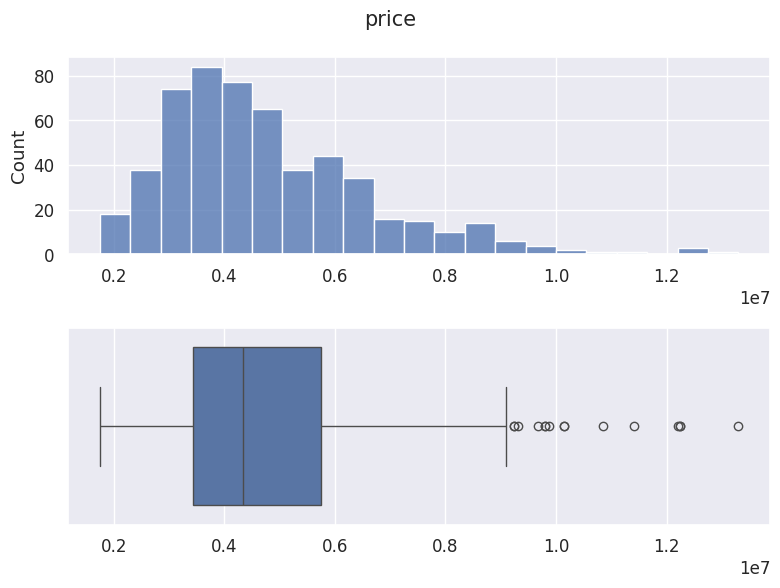

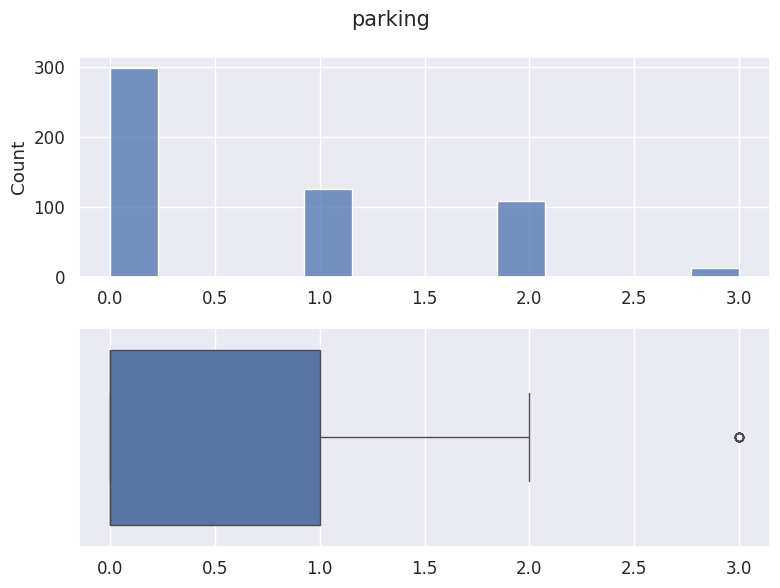

In [107]:
sns.set(font_scale=1.1)
for col in ["price","parking"]:
    fig,ax = plt.subplots(2,1,figsize=(8,6),tight_layout=True)
    fig.suptitle(col,size=15)
    sns.histplot(x=datah[col],ax=ax[0])
    sns.boxplot(x=datah[col],ax=ax[1])
    ax[0].set_xlabel("")
    ax[1].set_xlabel("")
    plt.show()

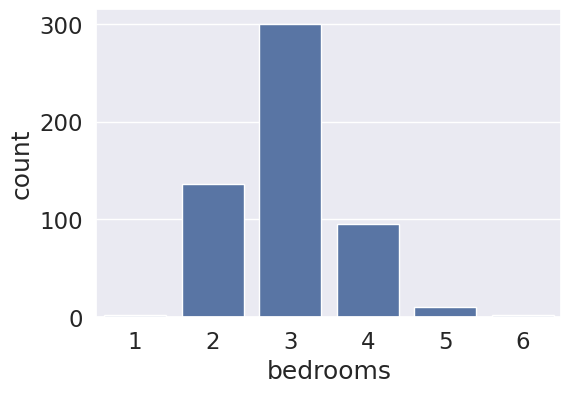

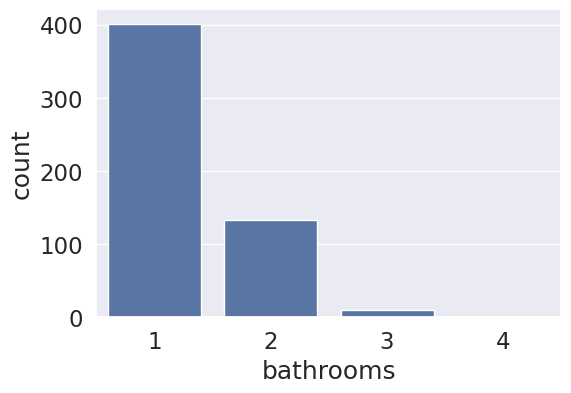

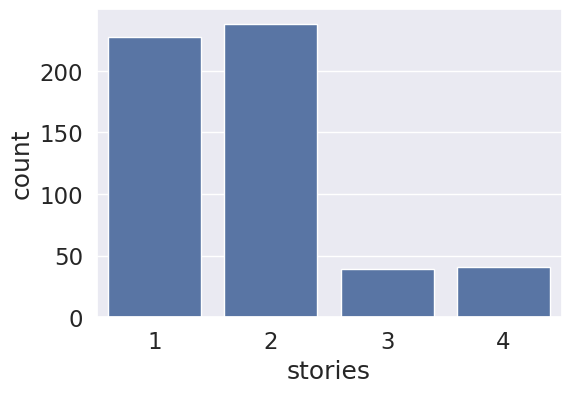

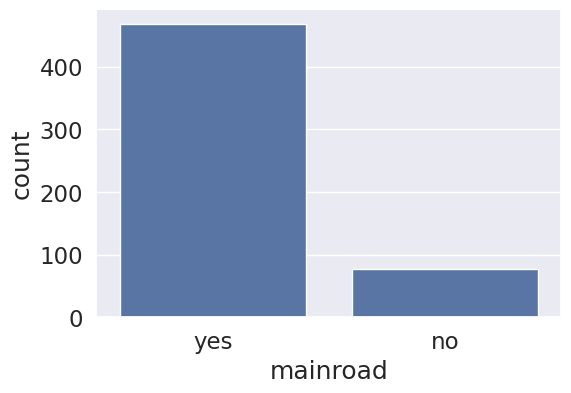

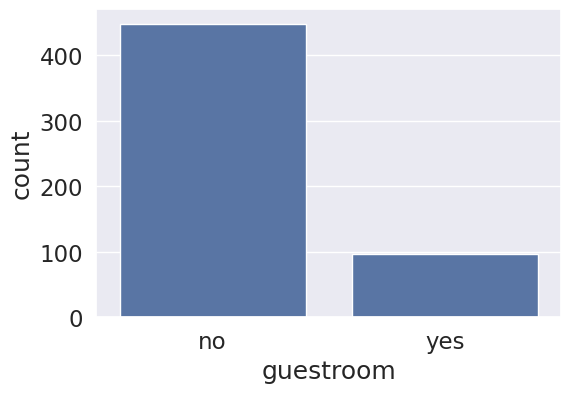

ValueError: Could not interpret value `basement` for `x`. An entry with this name does not appear in `data`.

In [108]:
sns.set(rc={"figure.figsize":(6, 4)})
sns.set(font_scale=1.5)
for col in data.columns:
    if col in ["price","parking", "area"]:
        continue
    sns.countplot(data=datah,x=col)
    plt.show()

### Analisis bivariante:

In [109]:
datah.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,hotwaterheating,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,3,no,furnished
2,12250000,9960,3,2,2,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,no,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,no,2,no,furnished


In [113]:
datac = datah.copy()

datac.drop(columns=['mainroad','guestroom','hotwaterheating','furnishingstatus', 'prefarea'],inplace=True)

datac.head()

,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2
3,12215000,7500,4,2,2,3
4,11410000,7420,4,1,2,2


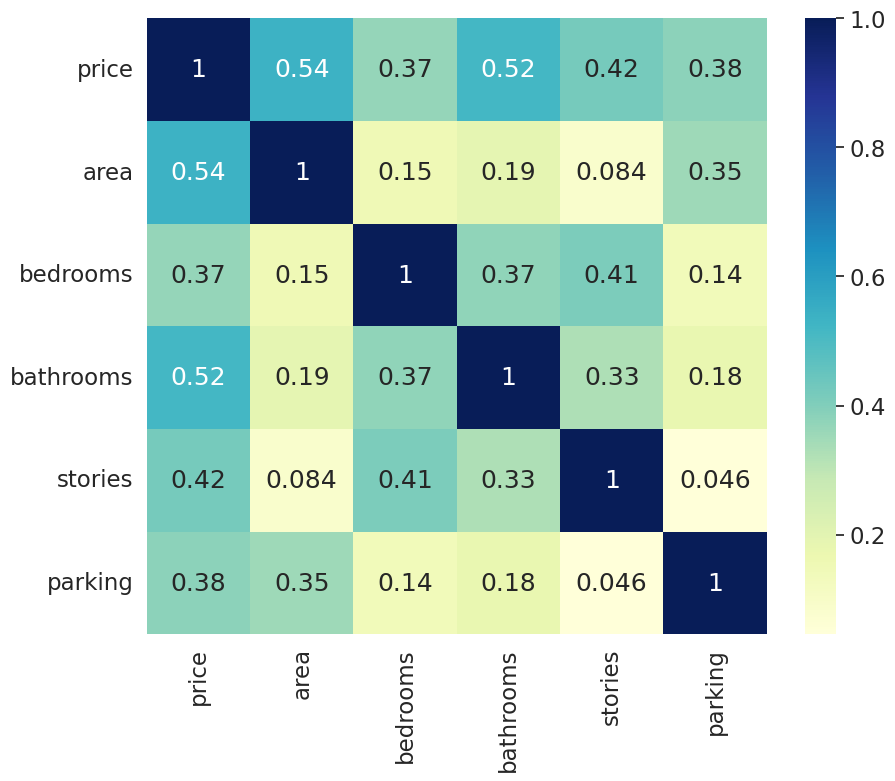

In [114]:

plt.figure(figsize=(10,8))
sns.heatmap(datac.corr(), cmap="YlGnBu", annot=True)#annot es para mostrar los numeros en cada casilla del mapa de calor
plt.show()

<Figure size 1000x800 with 0 Axes>

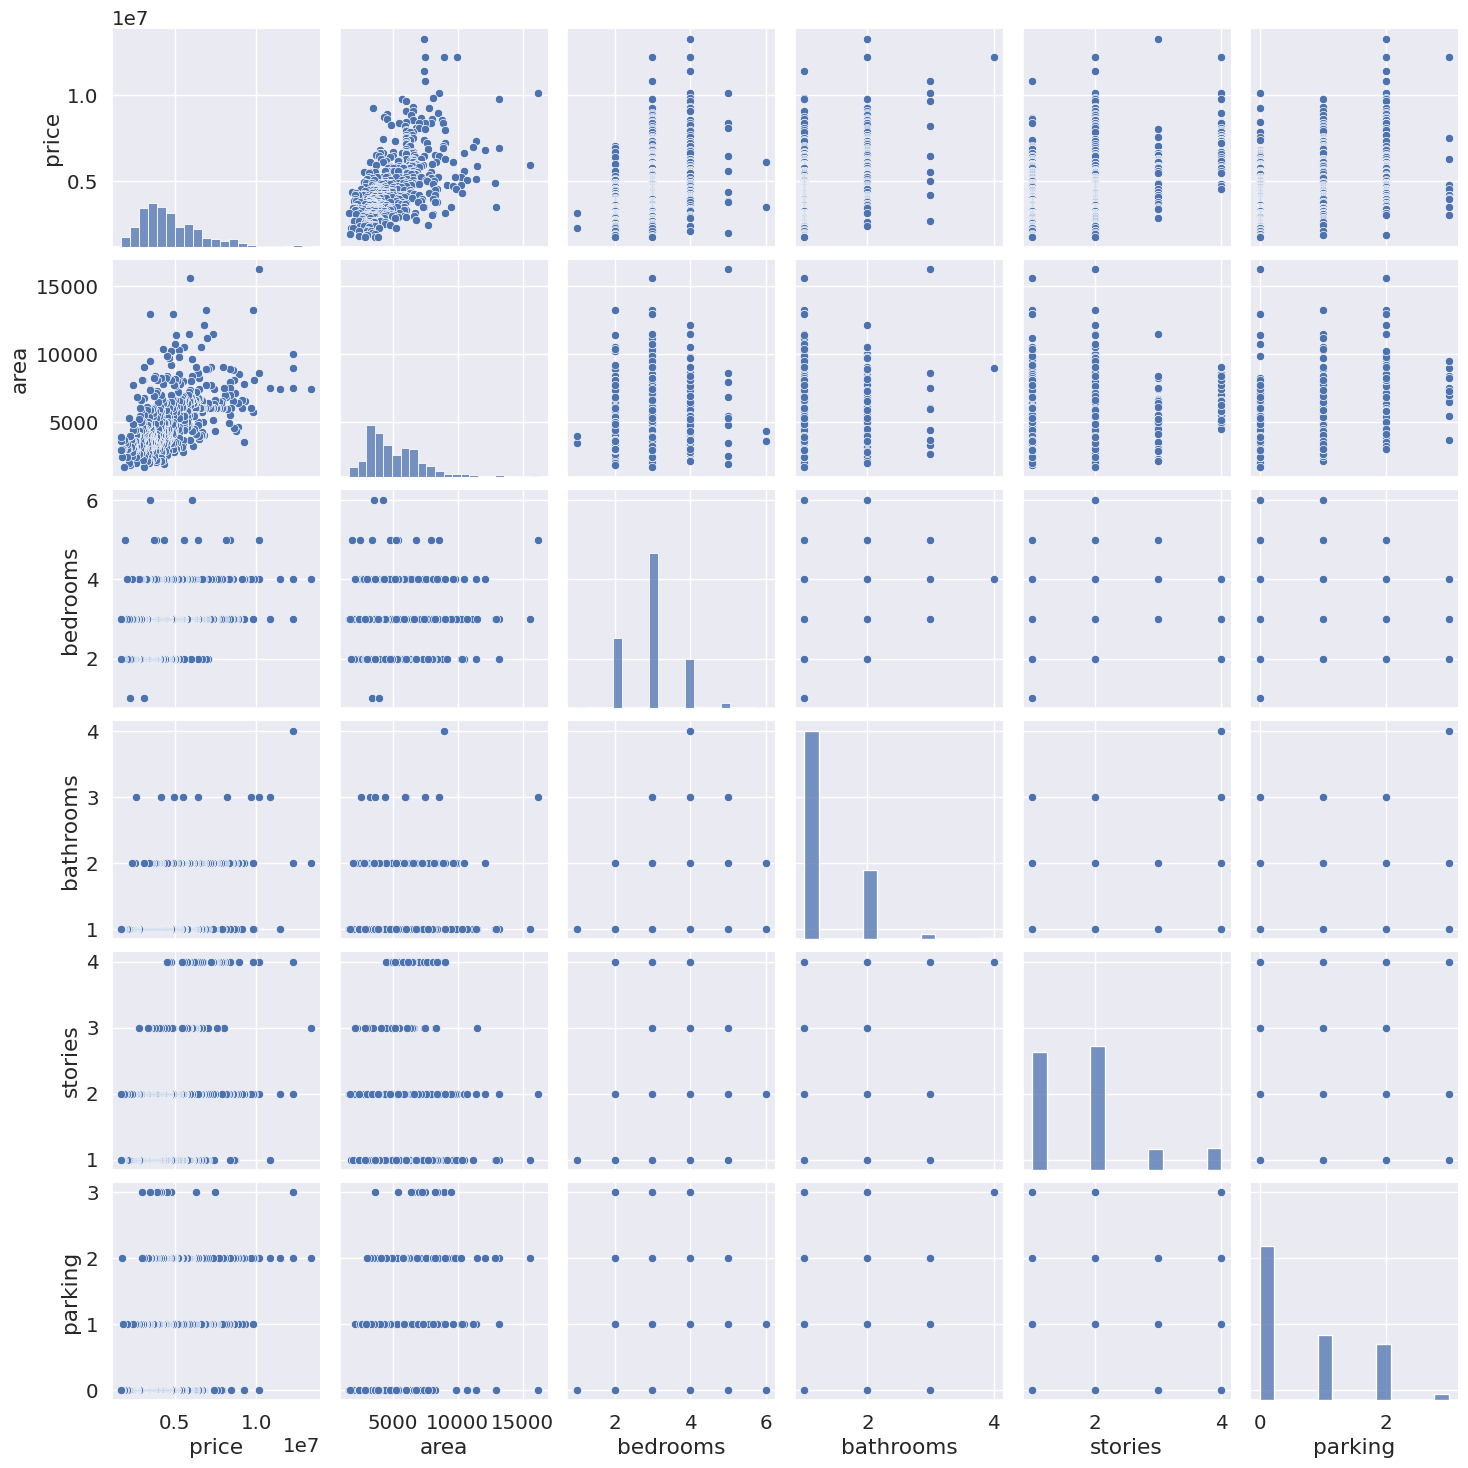

In [ ]:
plt.figure(figsize=(10,8))
sns.pairplot(data=datah)
plt.show()

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(datah.corr(), cmap="YlGnBu", annot=True)
plt.show()

ValueError: could not convert string to float: 'yes'

<Figure size 1000x800 with 0 Axes>

## 2. Regresion lineal simple

•Seleccione la variable m ́as correlacionada con el precio para un modelo de regresion
simple.

•Implemente manualmente el algoritmo de regresion lineal simple de scikit-learn.

•Calcule los parametros del modelo (pendiente en intercepto).

•Evalue el modelo usando:

    – Error cuadratico medio (MSE).

    – Coeficiente de determinacion .(R2)

•Realice predicciones sobre el conjunto de prueba.

•Evalue el modelo usando:

    – Error cuadratico medio (MSE).

    – Coeficiente de determinacion (R2).

•Genere un grafico comparando las predicciones con los valores reales.
